DATA PRE-PROCESSING AND LOADING

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from imblearn.over_sampling import SMOTE


In [ ]:
df= pd.read_csv('/content/The clinical laboratory data of bladder cancer .csv')
df.head()

,A/G Ratio,Albumin,Alk,ALT (GPT),AST (GOT),BUN,Calcium,Chloride,Creatinine,Direct Bilirubin,...,Urobilinogen,age,gender,Hyper1en1ion,Diabe1es,Smoking,Drinking,Bee1leNu1,FamilyHis1ory,Disease
0,NaN,3.9,53.0,28.0,25.0,11.0,NaN,107.0,0.60,0.1,...,0.2,72.0,0.0,0,0,0,0,0,0,Cystitis
1,NaN,3.2,87.0,14.0,26.0,9.8,NaN,101.8,0.60,0.1,...,0.1,74.0,0.0,0,0,0,0,0,0,Cystitis
2,NaN,4.4,69.0,28.0,16.0,21.0,8.5,100.0,1.40,0.2,...,1.0,69.0,1.0,1,1,0,0,0,0,Cystitis
3,NaN,NaN,NaN,18.0,24.0,11.0,NaN,103.9,0.96,NaN,...,0.1,69.0,1.0,0,0,0,1,0,0,Cystitis
4,NaN,4.1,175.0,34.0,66.0,184.0,7.4,110.0,3.10,0.2,...,0.2,69.0,1.0,1,1,0,0,0,0,Cystitis


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   A/G Ratio               746 non-null    float64
 1   Albumin                 1036 non-null   float64
 2   Alk                     830 non-null    float64
 3   ALT (GPT)               1245 non-null   float64
 4   AST (GOT)               1274 non-null   float64
 5   BUN                     1311 non-null   float64
 6   Calcium                 764 non-null    float64
 7   Chloride                1223 non-null   float64
 8   Creatinine              1329 non-null   float64
 9   Direct Bilirubin        931 non-null    float64
 10  Estimated GFR           1324 non-null   float64
 11  Glucose AC              1284 non-null   float64
 12  Nitrite                 1300 non-null   float64
 13  Urine occult Blood      1300 non-null   float64
 14  pH                      1300 non-null   

DATA CLEANING

In [ ]:
df.rename(columns={
    "Hyper1en1ion": "Hypertension",
    "Diabe1es": "Diabetes",
    "Bee1leNu1": "BeetleNut",
    "FamilyHis1ory": "FamilyHistory"
}, inplace=True)

In [ ]:
# numerical columns with median value
num_cols = df.select_dtypes(include=["float64"]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical columns: Fill with mode value
cat_cols = ["gender", "Disease"]
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Encode categorical variables
df["gender"] = df["gender"].astype(int)  # Assuming 0 and 1 for gender
df["Disease"] = df["Disease"].astype("category").cat.codes  # Convert disease to numerical codes

In [ ]:
df.head()

,A/G Ratio,Albumin,Alk,ALT (GPT),AST (GOT),BUN,Calcium,Chloride,Creatinine,Direct Bilirubin,...,Urobilinogen,age,gender,Hypertension,Diabetes,Smoking,Drinking,BeetleNut,FamilyHistory,Disease
0,1.7,3.9,53.0,28.0,25.0,11.0,9.0,107.0,0.60,0.1,...,0.2,72.0,0,0,0,0,0,0,0,0
1,1.7,3.2,87.0,14.0,26.0,9.8,9.0,101.8,0.60,0.1,...,0.1,74.0,0,0,0,0,0,0,0,0
2,1.7,4.4,69.0,28.0,16.0,21.0,8.5,100.0,1.40,0.2,...,1.0,69.0,1,1,1,0,0,0,0,0
3,1.7,4.2,68.0,18.0,24.0,11.0,9.0,103.9,0.96,0.1,...,0.1,69.0,1,0,0,0,1,0,0,0
4,1.7,4.1,175.0,34.0,66.0,184.0,7.4,110.0,3.10,0.2,...,0.2,69.0,1,1,1,0,0,0,0,0


In [ ]:
df.isnull().sum()


,0
A/G Ratio,0
Albumin,0
Alk,0
ALT (GPT),0
AST (GOT),0
BUN,0
Calcium,0
Chloride,0
Creatinine,0
Direct Bilirubin,0


In [ ]:
# Convert categorical columns to numerical (encoding the "Disease" column)
if df["Disease"].dtype == 'object':
    df["Disease"] = df["Disease"].astype("category").cat.codes

# Handle missing values by filling with median for numerical columns
df.fillna(df.median(numeric_only=True), inplace=True)

# Compute correlation matrix
corr_matrix = df.corr()

# Find correlation with the target variable (Disease)
corr_with_target = corr_matrix["Disease"].abs().sort_values(ascending=False)

# Select features with correlation above a threshold (e.g., 0.05)
selected_features = corr_with_target[corr_with_target > 0.05].index.tolist()

# Filter dataset with selected features
df_selected = df[selected_features]

# Display selected features
print("Selected Features:", selected_features)


Selected Features: ['Disease', 'gender', 'Strip WBC', 'Diabetes', 'Estimated GFR', 'A/G Ratio', 'Hypertension', 'Urobilinogen', 'Specific Gravity', 'Nitrite', 'Urine Ketone', 'Urine occult Blood', 'age', 'Drinking', 'Alk', 'Potassium']


Feature Selection

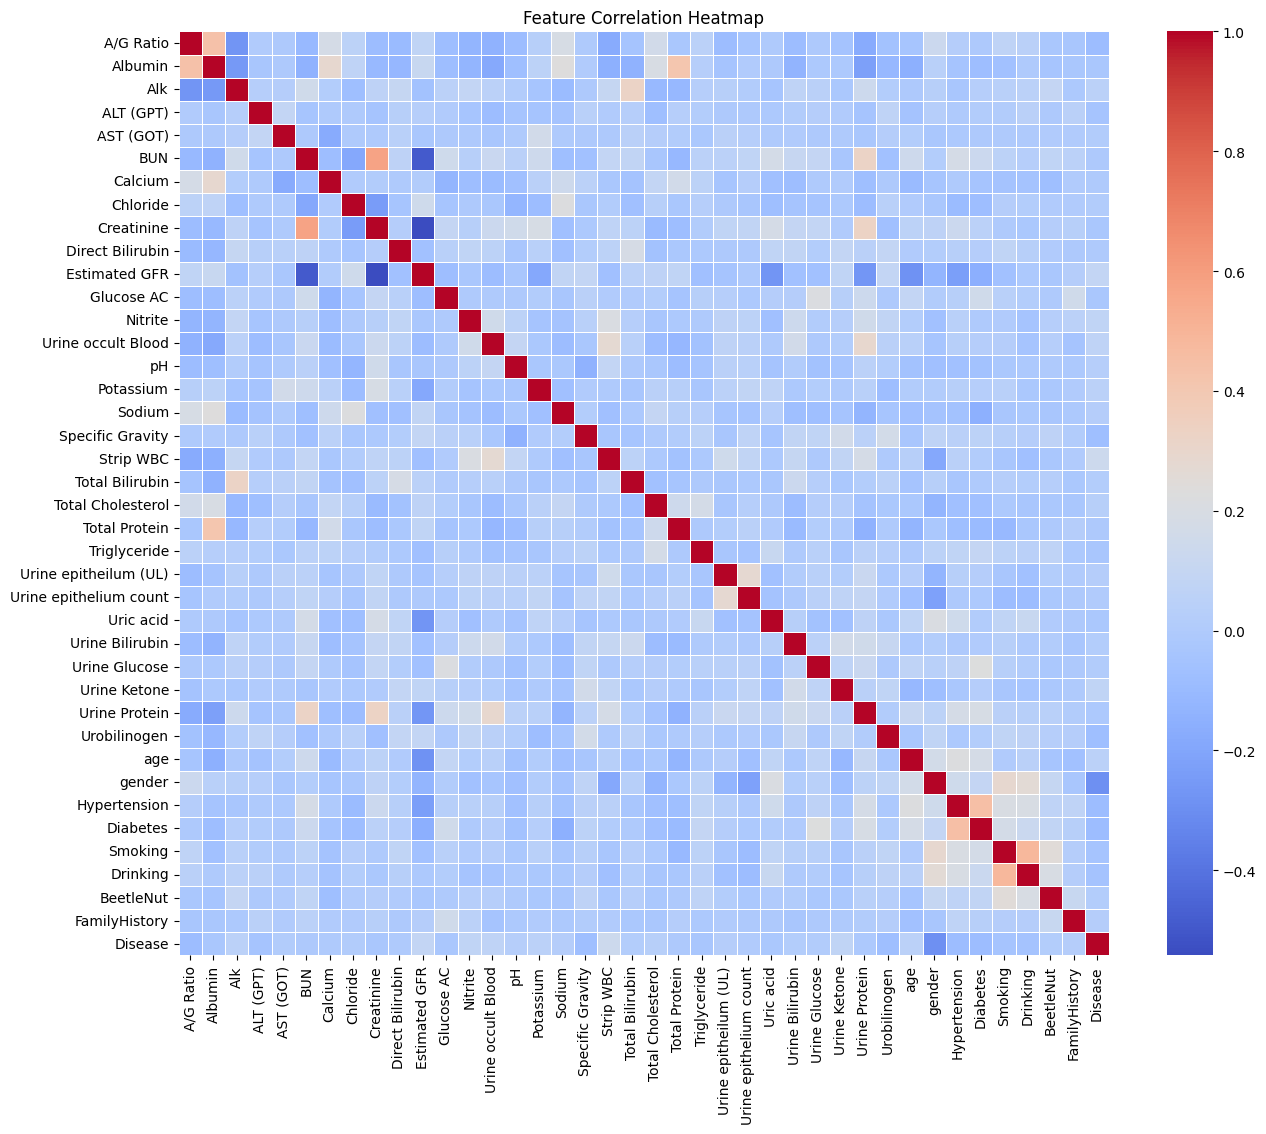

In [ ]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap of correlations
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Find top correlated features with Disease
corr_with_target = corr_matrix["Disease"].abs().sort_values(ascending=False)
corr_with_target

,Disease
Disease,1.000000
gender,0.293013
Strip WBC,0.136753
Diabetes,0.090183
Estimated GFR,0.089910
A/G Ratio,0.086366
Hypertension,0.084315
Urobilinogen,0.077445
Specific Gravity,0.075057
Nitrite,0.074179


In [ ]:
# put threshold value aand select features above that
threshold = 0.02
corr_with_target = corr_matrix["Disease"].abs().sort_values(ascending=False)
selected_features = corr_with_target[corr_with_target > threshold].index.tolist()

# Filter dataset with selected features
df_selected = df[selected_features]

# Display selected features
print("Selected Features:", selected_features)


Selected Features: ['Disease', 'gender', 'Strip WBC', 'Diabetes', 'Estimated GFR', 'A/G Ratio', 'Hypertension', 'Urobilinogen', 'Specific Gravity', 'Nitrite', 'Urine Ketone', 'Urine occult Blood', 'age', 'Drinking', 'Alk', 'Potassium', 'Smoking', 'ALT (GPT)', 'Triglyceride', 'Total Cholesterol', 'Albumin', 'pH', 'Glucose AC', 'Creatinine', 'Urine epitheilum (UL)', 'Sodium']


In [ ]:
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = df_selected.drop("Disease", axis=1)
y = df_selected["Disease"]

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced DataFrame
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced["Disease"] = y_resampled

# Now df_balanced contains the balanced dataset
print("Original Dataset Shape:", df_selected.shape)
print("Balanced Dataset Shape:", df_balanced.shape)


Original Dataset Shape: (1336, 26)
Balanced Dataset Shape: (2955, 26)


In [ ]:
# SMOTE
X = df_selected.drop("Disease", axis=1)
y = df_selected["Disease"]

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced["Disease"] = y_resampled


In [ ]:
# Train-Test Split
X = df_balanced.drop("Disease", axis=1)
y = df_balanced["Disease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# LightGBM Hyperparameter Tuning
param_grid = {
    'num_leaves': [31],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'subsample': [0.8],
    'reg_alpha': [0.1],
    'reg_lambda': [0.1],
    'min_child_samples': [20, 50],
}


In [ ]:

gbm = lgb.LGBMClassifier(objective='multiclass', num_class=len(y.unique()), boosting_type='gbdt')

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4763
[LightGBM] [Info] Number of data points in the train set: 2364, number of used features: 25
[LightGBM] [Info] Start training from score -1.609015
[LightGBM] [Info] Start training from score -1.609015
[LightGBM] [Info] Start training from score -1.609015
[LightGBM] [Info] Start training from score -1.611131
[LightGBM] [Info] Start training from score -1.609015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LGBMClassifier(num_class=5, objective='multiclass'),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [5, 10],
                         'min_child_samples': [20, 50],
                         'n_estimators': [100, 200], 'num_leaves': [31],
                         'reg_alpha': [0.1], 'reg_lambda': [0.1],
                         'subsample': [0.8]},
             scoring='accuracy', verbose=1)

In [ ]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 10, 'min_child_samples': 20, 'n_estimators': 200, 'num_leaves': 31, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.8}


In [ ]:
best_model = lgb.LGBMClassifier(**best_params, objective='multiclass', num_class=len(y.unique()))
best_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)])


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013783 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4763
[LightGBM] [Info] Number of data points in the train set: 2364, number of used features: 25
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score -1.609015
[LightGBM] [Info] Start training from score -1.609015
[LightGBM] [Info] Start training from score -1.609015
[LightGBM] [Info] Start training from score -1.611131
[LightGBM] [Info] Start training from score -1.609015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

LGBMClassifier(learning_rate=0.05, max_depth=10, n_estimators=200, num_class=5,
               objective='multiclass', reg_alpha=0.1, reg_lambda=0.1,
               subsample=0.8)

In [ ]:
# Predictions and evaluation
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the best model: {accuracy:.4f}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy of the best model: 0.9069
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       118
           1       0.88      0.78      0.83       118
           2       0.98      0.97      0.98       118
           3       0.81      0.86      0.83       119
           4       0.91      0.97      0.94       118

    accuracy                           0.91       591
   macro avg       0.91      0.91      0.91       591
weighted avg       0.91      0.91      0.91       591

[[113   0   2   0   3]
 [  1  92   0  21   4]
 [  2   0 115   1   0]
 [  0  13   0 102   4]
 [  2   0   0   2 114]]


In [ ]:
import shap
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

In [ ]:
shap.initjs()

if isinstance(shap_values, list):
    # We'll use the class with the largest number of samples
    class_idx = np.argmax(np.bincount(y_test))
    print(f"Using SHAP values for class index: {class_idx}")
    shap_vals_to_use = shap_values[class_idx]
else:
    shap_vals_to_use = shap_values

<Figure size 640x480 with 0 Axes>

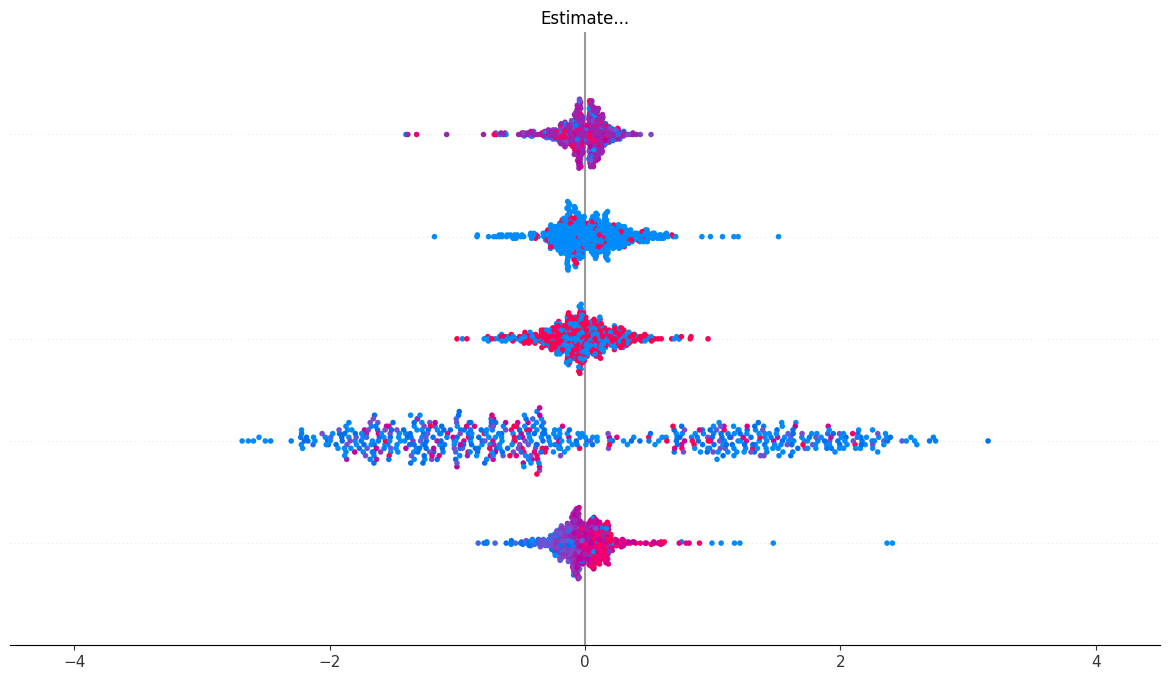

In [ ]:
# 1. SHAP Summary Plot (Beeswarm)
shap.summary_plot(shap_vals_to_use, X_test, plot_type="dot")

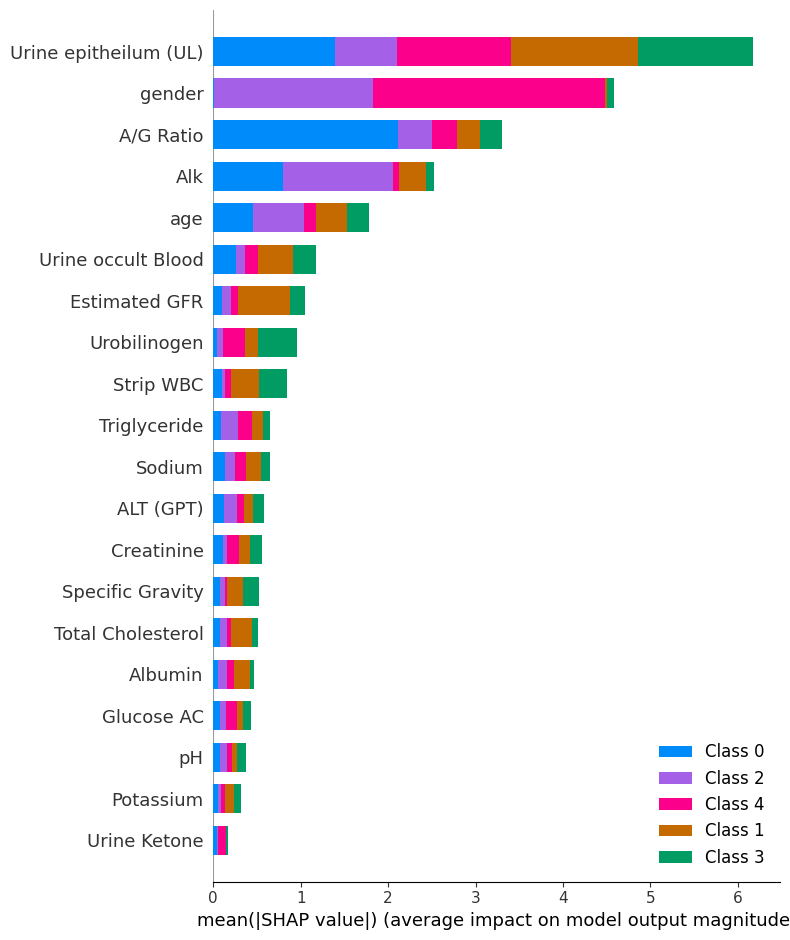

In [ ]:
# 2. SHAP Bar Plot
shap.summary_plot(shap_vals_to_use, X_test, plot_type="bar")

In [ ]:
import lime
import lime.lime_tabular

explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=[str(i) for i in y.unique()],
    mode='classification'
)

# Explain one instance
i = 0
exp = explainer_lime.explain_instance(X_test.values[i], best_model.predict_proba, num_features=10)
exp.show_in_notebook(show_table=True)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# Evaluate on test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")
# Evaluate on training set
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

Test Accuracy: 0.9069
Training Accuracy: 1.0000
